In [133]:
from seismostats.analysis import estimate_mc_ks, b_value_to_beta
from seismostats.catalogs.catalog import Catalog
from seismostats.analysis import BPositiveBValueEstimator
import numpy as np
import pandas as pd
import datetime as dt
import json

import matplotlib.pyplot as plt

import os

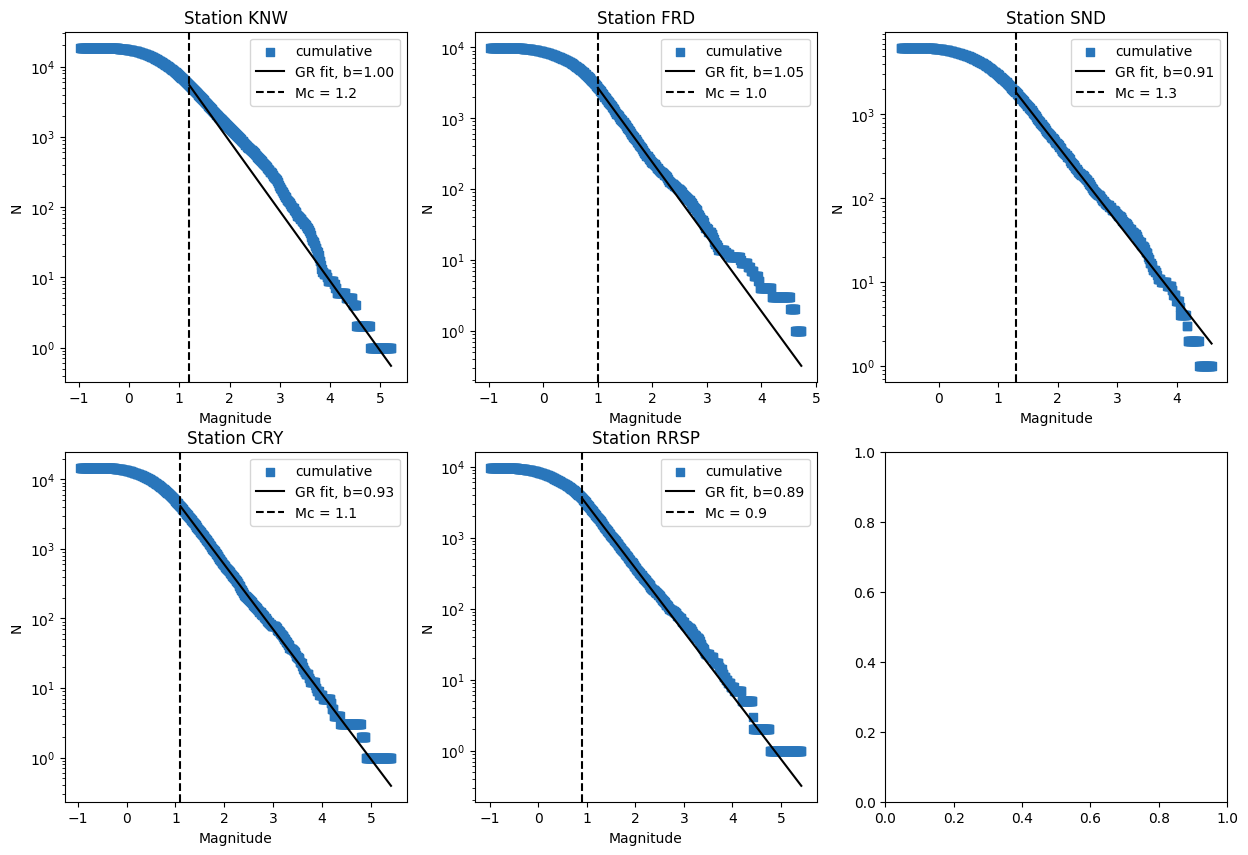

In [72]:
stations = ['KNW', 'FRD', 'SND', 'CRY', 'RRSP']
path = '../../results/Yuriko/Pick_catalog/'

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
i = 0

for station in stations:
    fn = os.path.join(path, f'All_magnitude_minmag-1.0_{station}.csv')
    df = pd.read_csv(fn, parse_dates=['time'], index_col=0)
    cat = Catalog(df)

    cat["magnitude"] = cat["mag"].astype(float)

    cat.delta_m = 0.01
    cat.bin_magnitudes(inplace=True)

    cat.estimate_mc_ks(mcs_test=np.arange(0.8, 4, 0.1))
    cat.estimate_b(method=BPositiveBValueEstimator, mc=cat.mc)

    axi = ax.flatten()[i]
    cat.plot_cum_fmd(b_value=cat.b_value, mc=cat.mc, color=['xkcd:bluish', 'k'], ax=axi)
    axi.axvline(cat.mc, color='k', linestyle='--', label='Mc = {:.1f}'.format(cat.mc))
    axi.legend()
    axi.set_title(f'Station {station}')
    i += 1

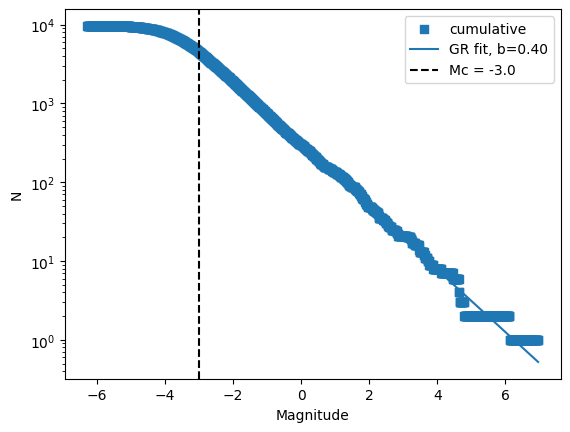

In [91]:
cat.b_value = None
cat.estimate_mc_ks(mcs_test=np.arange(-4, 4, 0.1))
cat.estimate_b(method=BPositiveBValueEstimator, mc=cat.mc)
axi = cat.plot_cum_fmd()
axi.axvline(cat.mc, color='k', linestyle='--', label='Mc = {:.1f}'.format(cat.mc))
axi.legend()

In [93]:
cat

,id,time,pstime,mag,amp,p_prob,s_prob,mod_amp,amp_time1,p_time,s_time,magnitude
0,0,2015-01-01 13:54:10.738571,6.24,0.612334,286.00000,0.888011,0.798358,0.016305,2015-01-01T13:54:18.310000Z,2015-01-01T13:54:17.870000Z,2015-01-01T13:54:24.110000Z,0.61
1,1,2015-01-02 03:37:10.484286,3.68,0.089482,1567.00000,0.892732,0.803284,0.024518,2015-01-02T03:37:19.060000Z,2015-01-02T03:37:14.690000Z,2015-01-02T03:37:18.370000Z,0.09
2,2,2015-01-03 00:58:54.640000,2.66,0.174035,1567.00000,0.727428,0.839111,0.029788,2015-01-03T00:59:00.615000Z,2015-01-03T00:58:57.680000Z,2015-01-03T00:59:00.340000Z,0.17
3,3,2015-01-03 04:44:41.152857,5.72,1.303327,3570.00000,0.969825,0.787135,0.080044,2015-01-03T04:44:53.630000Z,2015-01-03T04:44:47.690000Z,2015-01-03T04:44:53.410000Z,1.30
4,4,2015-01-03 09:49:11.908571,4.91,2.551448,32036.00000,0.975438,0.615726,2.827796,2015-01-03T09:49:22.850000Z,2015-01-03T09:49:17.520000Z,2015-01-03T09:49:22.430000Z,2.55
...,...,...,...,...,...,...,...,...,...,...,...,...
9640,3036,2024-07-29 02:04:22.617143,6.32,3.131885,41966.23766,0.930554,0.729727,3.403180,2024-07-29T02:04:28.835000Z,2024-07-29T02:04:29.840000Z,2024-07-29T02:04:36.160000Z,3.13
9641,3037,2024-07-30 00:57:41.931429,5.59,0.901339,1226.00000,0.876567,0.533095,0.031720,2024-07-30T00:57:54.290000Z,2024-07-30T00:57:48.320000Z,2024-07-30T00:57:53.910000Z,0.90
9642,3038,2024-07-30 02:21:17.920000,4.48,1.255194,3593.00000,0.861010,0.554754,0.142953,2024-07-30T02:21:27.840000Z,2024-07-30T02:21:23.040000Z,2024-07-30T02:21:27.520000Z,1.26
9643,3039,2024-07-30 19:46:18.502857,3.41,0.550757,2741.00000,0.832059,0.535304,0.070918,2024-07-30T19:46:26.105000Z,2024-07-30T19:46:22.400000Z,2024-07-30T19:46:25.810000Z,0.55


/Users/leila/git_repos/github/SeismoStats/seismostats/analysis/estimate_mc.py:246: UserWarning: Mcs to test are not binned correctly. Test might fail because of this.
  warnings.warn("Mcs to test are not binned correctly. "
/Users/leila/git_repos/github/SeismoStats/seismostats/analysis/estimate_mc.py:246: UserWarning: Mcs to test are not binned correctly. Test might fail because of this.
  warnings.warn("Mcs to test are not binned correctly. "
/Users/leila/git_repos/github/SeismoStats/seismostats/analysis/estimate_mc.py:246: UserWarning: Mcs to test are not binned correctly. Test might fail because of this.
  warnings.warn("Mcs to test are not binned correctly. "
/Users/leila/git_repos/github/SeismoStats/seismostats/analysis/bvalue/base.py:110: UserWarning: No magnitudes in the lowest magnitude bin are present.Check if mc is chosen correctly.
  warnings.warn(
/Users/leila/git_repos/github/SeismoStats/seismostats/analysis/estimate_mc.py:246: UserWarning: Mcs to test are not binned corre

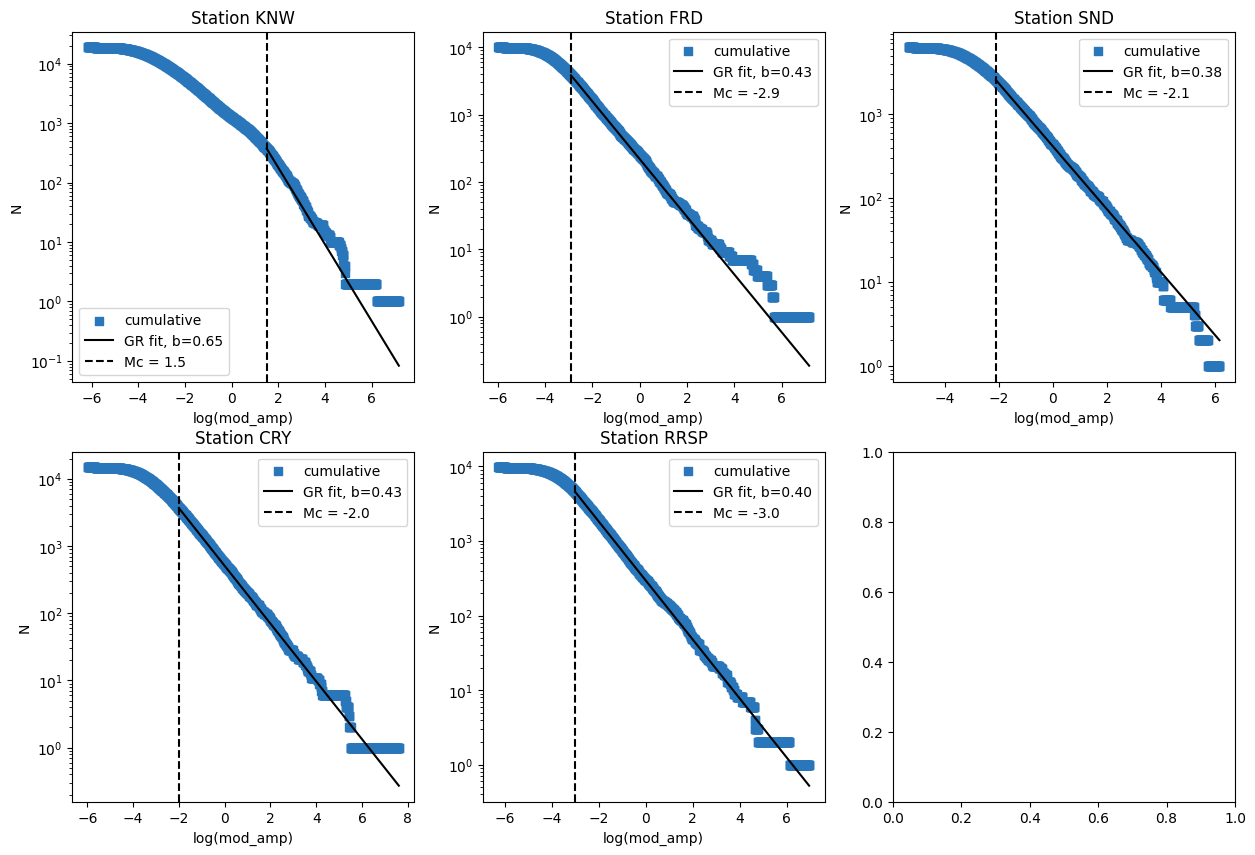

In [119]:
stations = ['KNW', 'FRD', 'SND', 'CRY', 'RRSP']
path = '../../results/Yuriko/Pick_catalog/'

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
i = 0

for station in stations:
    fn = os.path.join(path, f'All_magnitude_minmag-1.0_{station}.csv')
    df = pd.read_csv(fn, parse_dates=['time'], index_col=0)
    cat = Catalog(df)

    cat["magnitude"] = np.log(cat["mod_amp"]).astype(float)

    cat.delta_m = 0.01
    cat.bin_magnitudes(inplace=True)

    cat.estimate_mc_ks(mcs_test=np.arange(-5.0, 4, 0.1))
    cat.estimate_b(method=BPositiveBValueEstimator, mc=cat.mc)

    axi = ax.flatten()[i]
    cat.plot_cum_fmd(b_value=cat.b_value, mc=cat.mc, color=['xkcd:bluish', 'k'], ax=axi)
    axi.axvline(cat.mc, color='k', linestyle='--', label='Mc = {:.1f}'.format(cat.mc))
    axi.legend()
    axi.set_xlabel('log(mod_amp)')
    axi.set_title(f'Station {station}')
    i += 1

In [187]:
np.log10(np.exp(-2.1)) + 1.4

0.48798158800317104

In [149]:
cat["latitude"] = 36
cat["longitude"] = 138

from etas.inversion import ETASParameterCalculation
from etas.plots import ETASFitVisualisation

In [205]:
stations = ['KNW', 'FRD', 'SND', 'CRY', 'RRSP']
path = '../../results/Yuriko/Pick_catalog/'

i = 0
mag = 'mag'

station = 'SND'
fn = os.path.join(path, f'All_magnitude_minmag-1.0_{station}.csv')
df = pd.read_csv(fn, parse_dates=['time'], index_col=0)
cat = Catalog(df)

if mag == 'mod_amp':
    cat["magnitude"] = np.log10(cat["mod_amp"]).astype(float)
else:
    cat["magnitude"] = cat["mag"].astype(float)
    
cat.delta_m = 0.01
cat.bin_magnitudes(inplace=True)
cat.estimate_mc_ks(mcs_test=np.arange(-2.5, 4, 0.1))
cat.estimate_b(method=BPositiveBValueEstimator, mc=cat.mc)

print(cat.mc, cat.b_value)

/Users/leila/git_repos/github/SeismoStats/seismostats/analysis/estimate_mc.py:246: UserWarning: Mcs to test are not binned correctly. Test might fail because of this.
  warnings.warn("Mcs to test are not binned correctly. "
/Users/leila/git_repos/github/SeismoStats/seismostats/analysis/bvalue/base.py:110: UserWarning: No magnitudes in the lowest magnitude bin are present.Check if mc is chosen correctly.
  warnings.warn(


1.3000000000000034 0.910605895972213


In [206]:
from etas import set_up_logger
import logging

set_up_logger(level=logging.DEBUG)

cat["latitude"] = 36
cat["longitude"] = 138

inversion_meta = {
    "catalog": cat,
    "mc": cat.mc,
    # "beta": b_value_to_beta(cat.b_value),
    "delta_m": cat.delta_m,
    "coppersmith_multiplier": 100,
    "auxiliary_start": dt.datetime(2015, 1, 1),
    "timewindow_start": dt.datetime(2017, 1, 1),
    "timewindow_end": dt.datetime(2024, 8, 1),
    "shape_coords": [(35.9, 137.9), (36.1, 137.9), 
                     (36.1, 138.1), (35.9, 138.1)],
    "id": station + ('_mag' if mag == 'mag' else ''),
    "name": station + ('_mag' if mag == 'mag' else ''),
    "fixed_parameters": {
        "gamma": 0.0,
        "log10_d": 0.0,
        "rho": 1.0,
    },
    "theta_0": {
        "log10_mu": -np.inf,
        "log10_k0": -1.94,
        "a": 0.73,
        "log10_c": -3.07,
        "omega": -0.29,
        "log10_tau": 2.60,
        "log10_d": 0.0,
        "gamma": 0.0,
        "rho": 1.0
    }
}
  
inversion = ETASParameterCalculation(
    inversion_meta
)

inversion.prepare()
inversion.invert()

03-07-25 14:08:00 : INFO     : etas.inversion  - INITIALIZING...
03-07-25 14:08:00 : INFO     : etas.inversion  -   model is named SND_mag, has ID SND_mag
03-07-25 14:08:00 : INFO     : etas.inversion  -   Time Window: 
      2015-01-01 00:00:00 (aux start)
      2017-01-01 00:00:00 (start)
      2024-08-01 00:00:00 (end).
03-07-25 14:08:00 : INFO     : etas.inversion  -   free_productivity: False, free_background: False
03-07-25 14:08:00 : INFO     : etas.inversion  - PREPARING SND_mag
03-07-25 14:08:00 : INFO     : etas.inversion  -   filtering catalog...
03-07-25 14:08:00 : INFO     : etas.inversion  -   6262 out of 6262 events are within time window.
03-07-25 14:08:00 : INFO     : etas.inversion  -   Coordinates of region: [array([ 35.9, 137.9]), array([ 36.1, 137.9]), array([ 36.1, 138.1]), array([ 35.9, 138.1])]
03-07-25 14:08:00 : INFO     : etas.inversion  - Region has 400.17842193918256 square km
03-07-25 14:08:00 : INFO     : etas.inversion  - 6262 events lie within target re

{'log10_mu': -inf,
 'log10_iota': None,
 'log10_k0': -1.9857423387686948,
 'a': 0.7754458051850606,
 'log10_c': -3.4835499785088957,
 'omega': -0.3483221142417944,
 'log10_tau': 2.500166714272243,
 'log10_d': 0.0,
 'gamma': 0.0,
 'rho': 1.0}

In [207]:
inversion.store_results("../../results/Leila/ETAS/", store_pij=True)

03-07-25 14:11:42 : INFO     : etas.inversion  -   Data will be stored in ../../results/Leila/ETAS/


In [208]:
import json
with open(f"../../results/Leila/ETAS/parameters_{station}.json", 'r') as f:
        etas_output = json.load(f)

visualization_meta = {
        "fn_catalog": etas_output["fn_ip"],
        "fn_pij": etas_output["fn_pij"],
        "delta_m": etas_output["delta_m"],
        "mc": etas_output["m_ref"],
        "parameters": etas_output["final_parameters"],
        "label": etas_output["name"],
        "magnitude_list": np.arange(
            etas_output["m_ref"],
            4.0,
            0.1), 
        "store_path": "../../results/Leila/ETAS/plots/",
        "comparison_parameters": {
            "SND_mag": {
            "log10_mu": -np.inf,
            'log10_k0': -1.9857423387686948,
            'a': 0.7754458051850606,
            'log10_c': -3.4835499785088957,
            'omega': -0.3483221142417944,
            'log10_tau': 2.500166714272243,
            'log10_d': 0.0,
            'gamma': 0.0,
            'rho': 1.0,
            "mc": 1.3,
            "delta_m": 0.01,
            "beta": 1.9348555985269713
            }
        }
    }


fit_vis = ETASFitVisualisation(visualization_meta)

/Users/leila/git_repos/github/sed_etas/etas/plots.py:357: RuntimeWarning: divide by zero encountered in log10
  params["log10_mu"] = np.log10(mu)


In [209]:
fit_vis.all_plots()

03-07-25 14:13:14 : DEBUG    : matplotlib.ticker - vmin 0.00013136634284452767 vmax 6819.451039883306
03-07-25 14:13:14 : DEBUG    : matplotlib.ticker - ticklocs array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])
03-07-25 14:13:14 : DEBUG    : matplotlib.ticker - vmin 0.00013136634284452767 vmax 6819.451039883306
03-07-25 14:13:14 : DEBUG    : matplotlib.ticker - ticklocs array([2.e-05, 3.e-05, 4.e-05, 5.e-05, 6.e-05, 7.e-05, 8.e-05, 9.e-05,
       2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04, 8.e-04, 9.e-04,
       2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03, 8.e-03, 9.e-03,
       2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,
     

ValueError: zero-size array to reduction operation minimum which has no identity

In [242]:
from etas.inversion import expected_aftershocks, parameter_dict2array
import numpy as np

pars = {
    "log10_mu": -np.inf, 
    "log10_iota": None, 
    "log10_k0": -1.937504242553637, 
    "a": 0.7275260189793312, 
    "log10_c": -3.0754710889453802, 
    "omega": -0.2882840963021697, 
    "log10_tau": 2.597021529715032, 
    "log10_d": 0.0, 
    "gamma": 0.0, 
    "rho": 1.0}

total_aftershocks = expected_aftershocks(
        3,
        [parameter_dict2array(pars)[2:], 0.9],
        no_end=True, no_start=True
    )

expected_aftershocks(
        [
            3, 28.7
        ],
        [parameter_dict2array(pars)[2:], 0.9],
        no_end=False, no_start=True
    ) / total_aftershocks

0.5008642403558466